In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

tasks = data['task_id']

Result for Work Duration with Random forrest first and then other
keytype_changed
mouseclick_button
mousemove_distance
work_duration
keytype_changed_time
mouseclick_button_time
mousemove_distance_time
-----------------------------------------------------------------------------------------------------------
 Printing Results For Logistic Regression 

TRAIN SET
[[1332    1]
 [   1 1166]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1333
          1       1.00      1.00      1.00      1167

avg / total       1.00      1.00      1.00      2500

TEST SET
[[623 670]
 [541 666]]
             precision    recall  f1-score   support

          0       0.54      0.48      0.51      1293
          1       0.50      0.55      0.52      1207

avg / total       0.52      0.52      0.52      2500

Area under the ROC Curve % 0.516427439575


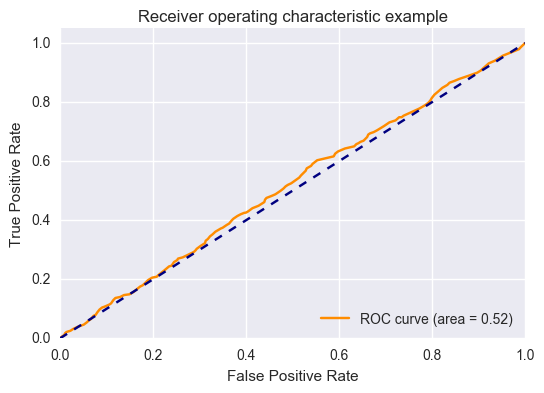

---------------------------------------------------------------------------------------------------------------------
 Printing Results For KNN 

TRAIN SET
[[1333    0]
 [  63 1104]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      1333
          1       1.00      0.95      0.97      1167

avg / total       0.98      0.97      0.97      2500

TEST SET
[[819 474]
 [729 478]]
             precision    recall  f1-score   support

          0       0.53      0.63      0.58      1293
          1       0.50      0.40      0.44      1207

avg / total       0.52      0.52      0.51      2500



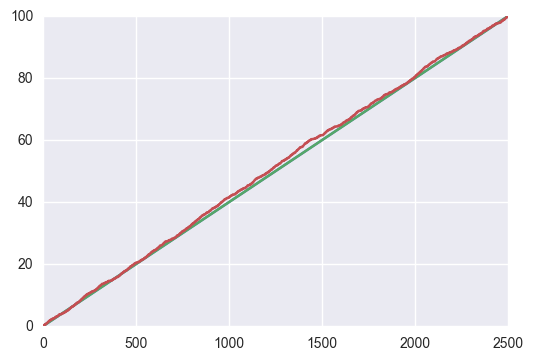

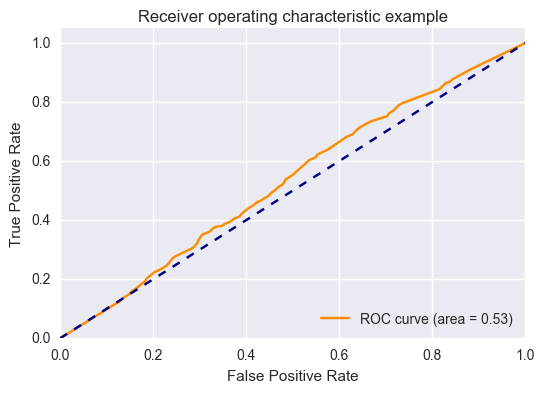

Area under the ROC Curve % 0.532357971129
---------------------------------------------------------------------------------------------------------------------
 Printing Results For Random Forrest Classifier 

TRAIN SET
[[1333    0]
 [   0 1167]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1333
          1       1.00      1.00      1.00      1167

avg / total       1.00      1.00      1.00      2500

TEST SET
[[526 767]
 [461 746]]
             precision    recall  f1-score   support

          0       0.53      0.41      0.46      1293
          1       0.49      0.62      0.55      1207

avg / total       0.51      0.51      0.50      2500



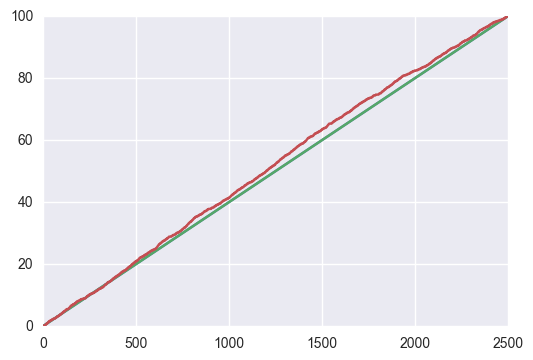

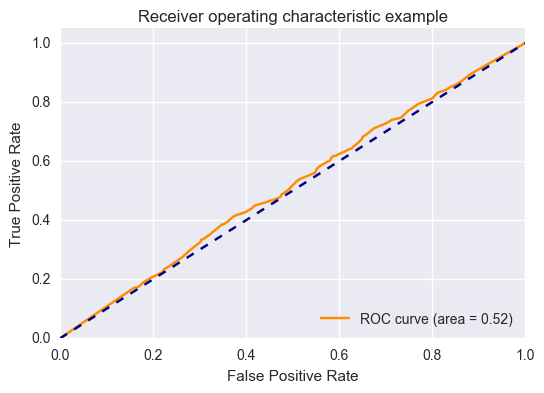

Area under the ROC Curve % 0.516360159959
---------------------------------------------------------------------------------------------------------------------
 Printing Results For Naive Bayes Classifier 

TRAIN SET
[[1330    3]
 [   1 1166]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1333
          1       1.00      1.00      1.00      1167

avg / total       1.00      1.00      1.00      2500

TEST SET
[[ 235 1058]
 [ 220  987]]
             precision    recall  f1-score   support

          0       0.52      0.18      0.27      1293
          1       0.48      0.82      0.61      1207

avg / total       0.50      0.49      0.43      2500



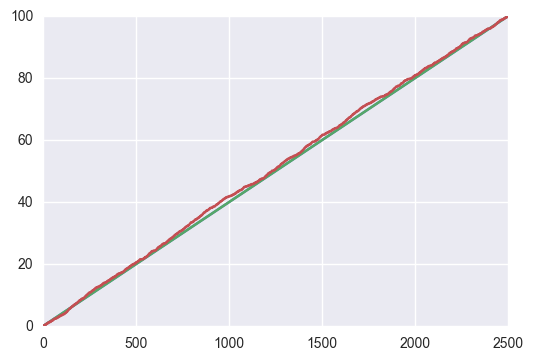

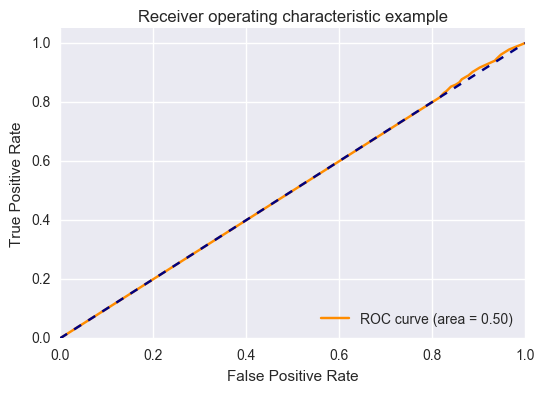

Area under the ROC Curve % 0.501573702256
---------------------------------------------------------------------------------------------------------------------
 Printing Results For SVM Classifier 

TRAIN SET
[[1331    2]
 [   2 1165]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1333
          1       1.00      1.00      1.00      1167

avg / total       1.00      1.00      1.00      2500

TEST SET
[[702 591]
 [618 589]]
             precision    recall  f1-score   support

          0       0.53      0.54      0.54      1293
          1       0.50      0.49      0.49      1207

avg / total       0.52      0.52      0.52      2500

Area under the ROC Curve % 0.516874048074


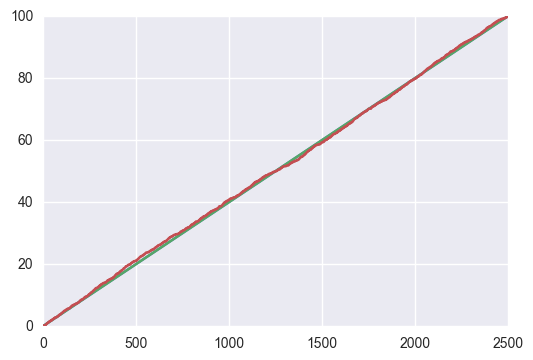

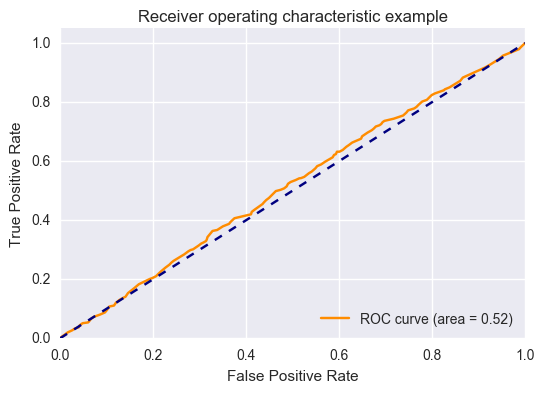

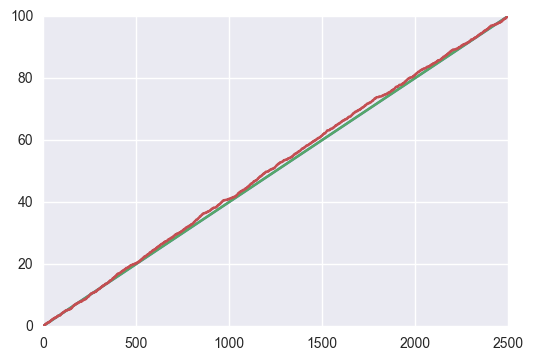

---------------------------------------------------------------------------------------------------------------------
 Printing Results For Decision Tree Classifier 

TRAIN SET
[[1333    0]
 [   0 1167]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1333
          1       1.00      1.00      1.00      1167

avg / total       1.00      1.00      1.00      2500

TEST SET
[[692 601]
 [614 593]]
             precision    recall  f1-score   support

          0       0.53      0.54      0.53      1293
          1       0.50      0.49      0.49      1207

avg / total       0.51      0.51      0.51      2500



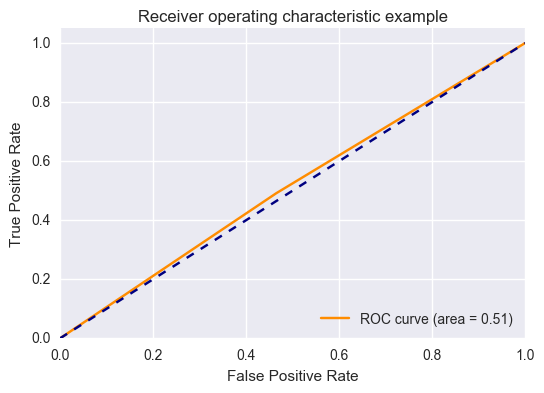

Area under the ROC Curve % 0.513245113738


,actual,prob,total_select_percent,random_select_percent,model_select_percent
1249,0.0,0.0,50.0,50.0,50.952775


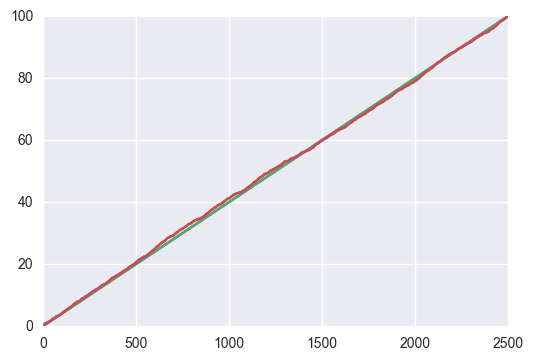

In [3]:
print ('Result for Work Duration with Random forrest first and then other')

data = pd.read_csv('master_with_work_duration.csv')

x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.5, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Random Forrest Classifier and fitting it to data
    from sklearn.ensemble import RandomForestClassifier
    RFC = RandomForestClassifier(n_estimators = 300)
    RFC.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = RFC.predict(x)
    predictions1 = RFC.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x = y_train[['keytype_changed','mouseclick_button','mousemove_distance','work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_y = y_train['error']
forrest_x1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance','work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_y1 = y_test['error']


#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = LR.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print ('Area under the ROC Curve %',roc_auc[1])    

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])

df[df['random_select_percent'] == 50]
#--------------------------------------------------------------------------------------------------------------------------------



#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = KNN.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])

df[df['random_select_percent'] == 50]


#---------------------------------------------------------------------------------------------------------------------------------


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = RFC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])

df[df['random_select_percent'] == 50]

#------------------------------------------------------------------------------------------------------------------------------


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = NBC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])


Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])

df[df['random_select_percent'] == 50]

#-------------------------------------------------------------------------------------------------------------------------------



#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0,probability =True)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = SVMC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
print('Area under the ROC Curve %',roc_auc[1])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])
plt.show()

df[df['random_select_percent'] == 50]

#-------------------------------------------------------------------------------------------------------------------------------

#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = DTC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

Y_cap = np.c_[forrest_y1,y_score[:, 1:]]
dataframe = pd.DataFrame(data=Y_cap)

df = dataframe
df.columns = ['actual' , 'prob']

df.sort_values(by = 'prob',ascending = False, inplace =True)

total = df['actual'].sum()
total_records = df.shape[0]
exit_ratio = total/total_records * 100

df = df.reset_index()
df.drop('index', axis =1, inplace =True)

df = df.assign(total_select_percent= range (1,2501))
df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

df = df.assign(random_select_percent = df['total_select_percent'])

df = df.assign(model_select_percent = 0)
df.loc[0,'model_select_percent'] = df['actual'][0]

for i in range (1,df.shape[0]):
    df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']
    
df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

plt.figure()
plt.plot(df['total_select_percent'])
plt.plot(df['random_select_percent'])
plt.plot(df['model_select_percent'])

df[df['random_select_percent'] == 50]
#-------------------------------------------------------------------------------------------------------------------------------

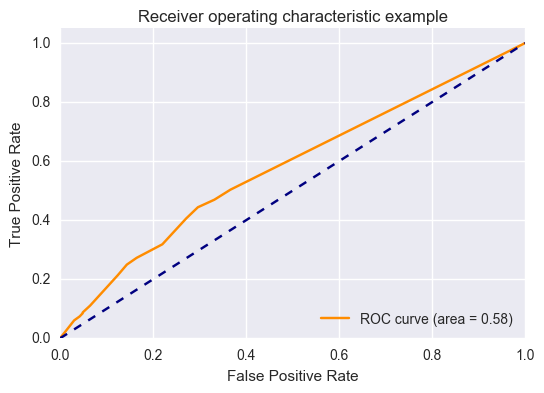

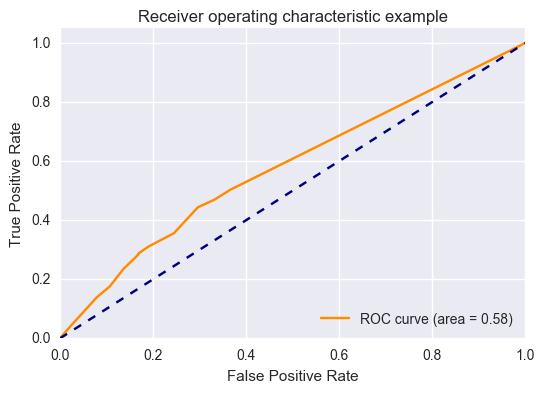

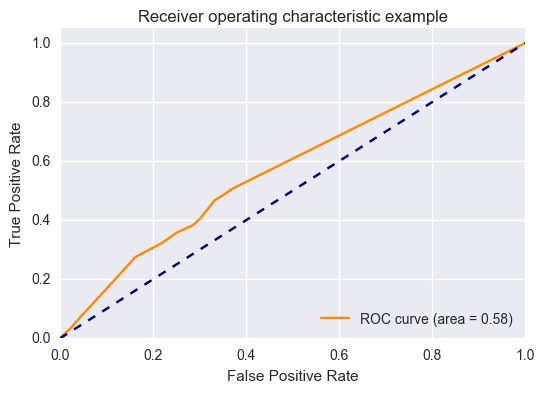

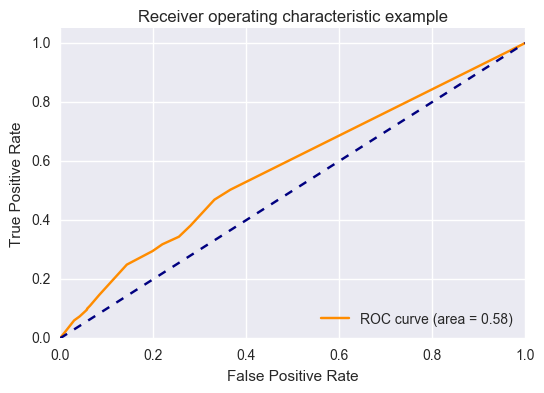

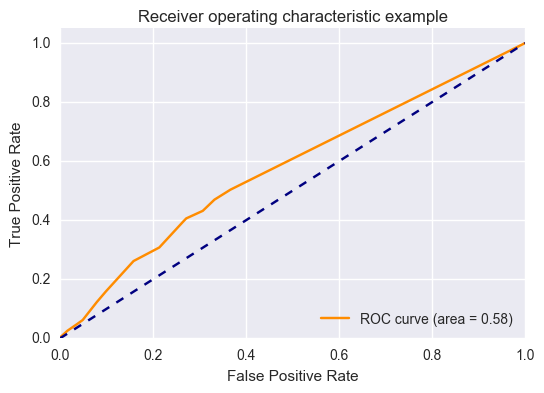

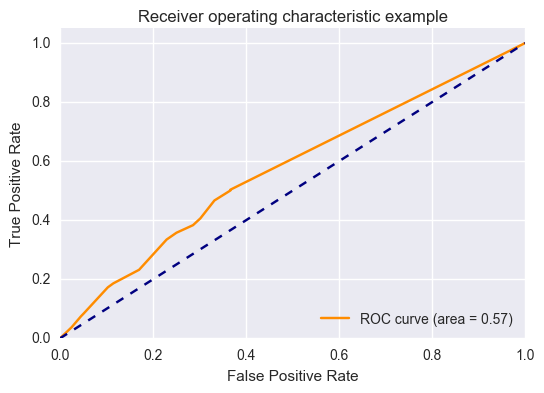

In [7]:
print ('Result for Work Duration with Logistic Regression first and then other')

x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Logistic Regression Classifier and fitting it to data
    from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression()
    LR.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = LR.predict(x)
    predictions1 = LR.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x = y_train[['keytype_changed','mouseclick_button','mousemove_distance','work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_y = y_train['error']
forrest_x1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance','work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_y1 = y_test['error']



#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = LR.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])



#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = KNN.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])





#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = RFC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])



#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = NBC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])






#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0,probability =True)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = SVMC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

y_score = DTC.predict_proba(forrest_x1)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print ('Area under the ROC Curve %',roc_auc[1])

In [9]:
x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Random Forrest Classifier and fitting it to data
    from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression()
    LR.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = LR.predict(x)
    predictions1 = LR.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x_1 = y_train[['keytype_changed','mouseclick_button','mousemove_distance']]
forrest_x_2 = y_train[['keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_x_3 = y_train[['work_duration']]
forrest_y_1 = y_train['error']
forrest_x1_1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance']]
forrest_x1_2 = y_test[['keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_x1_3 = y_test[['work_duration']]
forrest_y1 = y_test['error']

y_trainset = forrest_y_1
y_testset  = forrest_y1


# Applying Random Forrest Classifier 
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)

#for no of rows 
RFC.fit(forrest_x_1,forrest_y_1)
predictions = RFC.predict(forrest_x_1)
predictions1 = RFC.predict(forrest_x1_1)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= False)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = False)


#for length
RFC.fit(forrest_x_2,forrest_y_1)
predictions = RFC.predict(forrest_x_2)
predictions1 = RFC.predict(forrest_x1_2)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= False)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = False)


#for work duration
RFC.fit(forrest_x_3,forrest_y_1)
predictions = RFC.predict(forrest_x_3)
predictions1 = RFC.predict(forrest_x1_3)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= True)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = True)

print (y_trainset)
print (y_testset)

#Renaming 
y_trainset.rename(columns={0:'error',1:'complexity',2:'length',3:'work_duration'}, inplace = True)
y_testset.rename(columns={0:'error',1:'complexity',2:'length',3:'work_duration'}, inplace = True)

#Setting up new X and Y
forrest_x = y_trainset[['complexity','length','work_duration']]
forrest_y = y_trainset['error']
forrest_x1 = y_testset[['complexity','length','work_duration']]
forrest_y1 = y_testset['error']

#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x_1,forrest_y_1)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


keytype_changed
mouseclick_button
mousemove_distance
work_duration
keytype_changed_time
mouseclick_button_time
mousemove_distance_time
      0  1  2  3
0     1  1  1  0
1     1  1  1  0
2     1  1  1  0
3     0  1  1  0
4     1  0  1  0
5     1  0  0  0
6     0  0  0  0
7     0  0  0  0
8     0  0  0  0
9     0  0  0  0
10    1  0  1  0
11    0  0  0  0
12    0  0  0  0
13    1  0  0  0
14    0  0  1  0
15    0  1  1  0
16    1  0  0  0
17    0  1  0  0
18    0  0  0  0
19    0  0  0  0
20    0  0  0  0
21    1  0  0  0
22    1  0  0  0
23    0  0  0  0
24    1  0  0  0
25    0  1  1  0
26    0  1  1  0
27    1  1  0  0
28    1  0  0  0
29    0  0  0  0
...  .. .. .. ..
3470  0  1  1  0
3471  0  1  0  0
3472  1  0  0  0
3473  0  1  1  0
3474  0  0  0  0
3475  0  1  0  0
3476  1  0  0  0
3477  0  0  0  0
3478  0  0  0  0
3479  0  0  0  0
3480  1  0  0  0
3481  0  0  0  0
3482  0  0  0  0
3483  1  1  1  0
3484  1  0  0  0
3485  0  1  1  0
3486  1  1  1  0
3487  0  1  1  0
3488  1  0  0  

In [10]:
y_trainset

,error,complexity,length,work_duration
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,0,1,1,0
4,1,0,1,0
5,1,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [11]:
x_data = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time','task_id']]
y_data = data[['error','task_id']]

 
# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state =0)

df_ = pd.DataFrame()
df1_ = pd.DataFrame()

col = ['keytype_changed', 'mouseclick_button', 'mousemove_distance', 'work_duration','keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']
for name in col:
    print (name)
    #print (1)
    x = x_train[[name]]
    y = y_train['error']
    
    #print (2)
    #Importing Random Forrest Classifier and fitting it to data
    from sklearn.ensemble import RandomForestClassifier
    RFC = RandomForestClassifier(n_estimators = 200)
    RFC.fit(x,y) 

    #print (3)
    #Making Predictions and printing results
    predictions = RFC.predict(x)
    predictions1 = RFC.predict(x_test[[name]])
    
    #print (4)
    #Converting array into data frame 
    df = pd.DataFrame(predictions)
    df1 = pd.DataFrame(predictions1)
    #print (df.shape)
    
    #print (5)
    #Concatinating 2 data frames 
    df_ = pd.concat([df_,df], axis = 1 , ignore_index= True)  
    df1_ = pd.concat([df1_,df1], axis = 1 , ignore_index= True)

y_train = y_train.reset_index()
y_train = pd.concat([y_train,df_], axis = 1, ignore_index= False)

y_test = y_test.reset_index()
y_test = pd.concat([y_test,df1_], axis = 1, ignore_index= False)


#Renaming the columns
y_train.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)
y_test.rename(columns={0:'keytype_changed',1:'mouseclick_button',2:'mousemove_distance',3:'work_duration',4:'keytype_changed_time', 5:'mouseclick_button_time', 6:'mousemove_distance_time'}, inplace = True)


#Printing Y_train and Y_test
#print (y_train)
#print (y_test)


#Setting up new X and Y
forrest_x_1 = y_train[['keytype_changed','mouseclick_button','mousemove_distance']]
forrest_x_2 = y_train[['keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_x_3 = y_train[['work_duration']]
forrest_y_1 = y_train['error']
forrest_x1_1 = y_test[['keytype_changed','mouseclick_button','mousemove_distance']]
forrest_x1_2 = y_test[['keytype_changed_time', 'mouseclick_button_time', 'mousemove_distance_time']]
forrest_x1_3 = y_test[['work_duration']]
forrest_y1 = y_test['error']

y_trainset = forrest_y_1
y_testset  = forrest_y1


# Applying Random Forrest Classifier 
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)

#for no of rows 
RFC.fit(forrest_x_1,forrest_y_1)
predictions = RFC.predict(forrest_x_1)
predictions1 = RFC.predict(forrest_x1_1)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= False)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = False)


#for length
RFC.fit(forrest_x_2,forrest_y_1)
predictions = RFC.predict(forrest_x_2)
predictions1 = RFC.predict(forrest_x1_2)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= False)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = False)


#for work duration
RFC.fit(forrest_x_3,forrest_y_1)
predictions = RFC.predict(forrest_x_3)
predictions1 = RFC.predict(forrest_x1_3)

y_trainset = pd.concat([y_trainset, pd.DataFrame(predictions)], axis = 1, ignore_index= True)
y_testset = pd.concat([y_testset, pd.DataFrame(predictions1)], axis =1, ignore_index = True)

print (y_trainset)
print (y_testset)

#Renaming 
y_trainset.rename(columns={0:'error',1:'complexity',2:'length',3:'work_duration'}, inplace = True)
y_testset.rename(columns={0:'error',1:'complexity',2:'length',3:'work_duration'}, inplace = True)

#Setting up new X and Y
forrest_x = y_trainset[['complexity','length','work_duration']]
forrest_y = y_trainset['error']
forrest_x1 = y_testset[['complexity','length','work_duration']]
forrest_y1 = y_testset['error']

#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x,forrest_y)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#LOGISTIC REGRESSION
#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(forrest_x_1,forrest_y_1)

#Making predictions from test data
predictions = LR.predict(forrest_x)
predictions1 = LR.predict(forrest_x1)

#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print ('-----------------------------------------------------------------------------------------------------------')
print(' Printing Results For Logistic Regression \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))




#KNN
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
KNN.fit(forrest_x,forrest_y)

#Making Predictions and printing results
predictions = KNN.predict(forrest_x)
predictions1 = KNN.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For KNN \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#RANDOM FORREST CLASSIFIER
#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200)
RFC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = RFC.predict(forrest_x)
predictions1 = RFC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Random Forrest Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#NAIVE BAYES CLASSIFIER
#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = NBC.predict(forrest_x)
predictions1 = NBC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Naive Bayes Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))

#SVM WITH KERNEL
#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel='rbf', random_state = 0)
SVMC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = SVMC.predict(forrest_x)
predictions1 = SVMC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For SVM Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


#DECISION TREE CLASSIFIER
#Importing Decision Tree Classifier Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(forrest_x,forrest_y) 

#Making Predictions and printing results
predictions = DTC.predict(forrest_x)
predictions1 = DTC.predict(forrest_x1)

from sklearn.metrics import classification_report, confusion_matrix
print ('---------------------------------------------------------------------------------------------------------------------')
print(' Printing Results For Decision Tree Classifier \n')
print ('TRAIN SET')
print (confusion_matrix(forrest_y, predictions))
print (classification_report(forrest_y, predictions))
print ('TEST SET')
print (confusion_matrix(forrest_y1, predictions1))
print (classification_report(forrest_y1, predictions1))


keytype_changed
mouseclick_button
mousemove_distance
work_duration
keytype_changed_time
mouseclick_button_time
mousemove_distance_time
      0  1  2  3
0     1  1  1  1
1     1  1  1  1
2     1  1  1  1
3     0  0  0  0
4     1  1  1  1
5     1  1  1  1
6     0  0  0  0
7     0  0  0  0
8     0  0  0  0
9     0  0  0  0
10    1  1  1  1
11    0  0  0  0
12    0  0  0  0
13    1  1  1  1
14    0  0  0  0
15    0  0  0  0
16    1  0  1  1
17    0  0  0  0
18    0  0  0  0
19    0  0  0  0
20    0  0  0  0
21    1  1  1  0
22    1  0  1  1
23    0  0  0  0
24    1  1  1  1
25    0  0  0  0
26    0  0  0  0
27    1  0  1  0
28    1  1  1  1
29    0  0  0  0
...  .. .. .. ..
3470  0  0  0  0
3471  0  0  0  0
3472  1  1  1  1
3473  0  0  0  0
3474  0  0  0  0
3475  0  0  0  0
3476  1  1  1  1
3477  0  0  0  0
3478  0  0  0  0
3479  0  0  0  0
3480  1  1  1  1
3481  0  0  0  0
3482  0  0  0  0
3483  1  1  1  1
3484  1  1  1  1
3485  0  0  0  0
3486  1  1  1  1
3487  0  0  0  0
3488  1  1  1  

In [12]:
predictions2 = DTC.predict_proba(forrest_x1)

In [13]:
Y_cap = np.c_[forrest_y1,predictions2[:, 1:]]
df = pd.DataFrame(data = Y_cap)

df.columns = ['actual','score']
data = df

In [14]:
data

,actual,score
0,0.0,0.000000
1,1.0,0.028571
2,1.0,0.777778
3,1.0,1.000000
4,1.0,0.777778
5,1.0,0.777778
6,1.0,0.000000
7,1.0,0.994152
8,0.0,1.000000
9,1.0,1.000000


In [15]:
data = data.assign(TP= 0).astype(float)
data = data.assign(FP = 0).astype(float)

data.sort_values(by='score', ascending = False, inplace = True)
data.reset_index(level=0,drop =True, inplace = True)

for i in range(data.shape[0]):
    print (i)
    data.loc[i]['TP'] = sum(data['actual'][:i+1])
    data.loc[i]['FP'] = (i+1) - sum(data['actual'][:i+1])
    
ROC = data[['TP','FP']]
ROC.loc[-1] = [0,0]
ROC.index = ROC.index + 1
ROC = ROC.sort_index()

ROC = ROC.assign(TPR=0)
ROC = ROC.assign(FPR = 0)
ROC['TPR'] = ROC['TPR'].astype(float)
ROC['FPR'] = ROC['FPR'].astype(float)


tp = ROC['TP'][ROC.shape[0]-1]
fp = ROC['FP'][ROC.shape[0]-1]

for i in range(ROC.shape[0]):
    print (i)
    ROC['TPR'][i] = (ROC['TP'][i])/(tp)
    ROC['FPR'][i] = (ROC['FP'][i])/(fp)
    
ROC = ROC.assign(x=0).astype(float)
ROC = ROC.assign(y=0).astype(float)
ROC = ROC.assign(rect = 0).astype(float)

for i in range(1,ROC.shape[0]):
    print (i)
    ROC['x'][i] = ROC['FPR'][i] - ROC['FPR'][i-1]
    ROC['y'][i] = (ROC['TPR'][i]+ROC['TPR'][i-1])/2
    ROC['rect'][i] = ROC['x'][i]*ROC['y'][i]
    
AUC = round(ROC['rect'].sum(),2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906


In [16]:
AUC

0.51

In [59]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(forrest_y1, predictions2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [61]:
roc_auc

{0: 0.48017936805122163, 1: 0.51982063194877837}

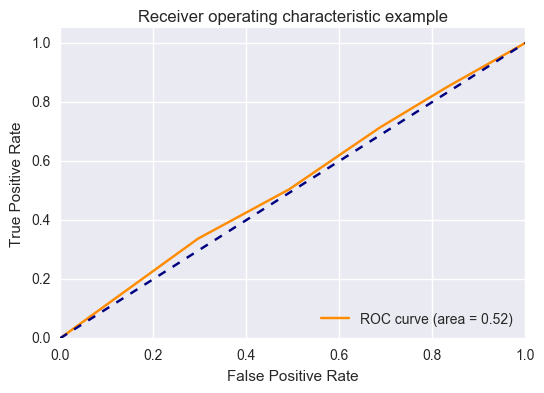

In [67]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()